In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [5]:
# TODO : Import the Data from the kaggle API
df = pd.read_csv('AB_Test_Results.csv', sep=',')
df.head(5)


,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


# Data Understanding

In [ ]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame, Counting Missing Values, Descriptive Statistics, Value Counts for VARIANT_NAME, Counting Unique Users in USER_ID

In [7]:
df.info()


print(df.columns)

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB
Index(['USER_ID', 'VARIANT_NAME', 'REVENUE'], dtype='object')
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64


In [8]:
print(df.describe())



            USER_ID       REVENUE
count  10000.000000  10000.000000
mean    4981.080200      0.099447
std     2890.590115      2.318529
min        2.000000      0.000000
25%     2468.750000      0.000000
50%     4962.000000      0.000000
75%     7511.500000      0.000000
max    10000.000000    196.010000


VARIANT_NAME
variant    5016
control    4984
Name: count, dtype: int64
6324


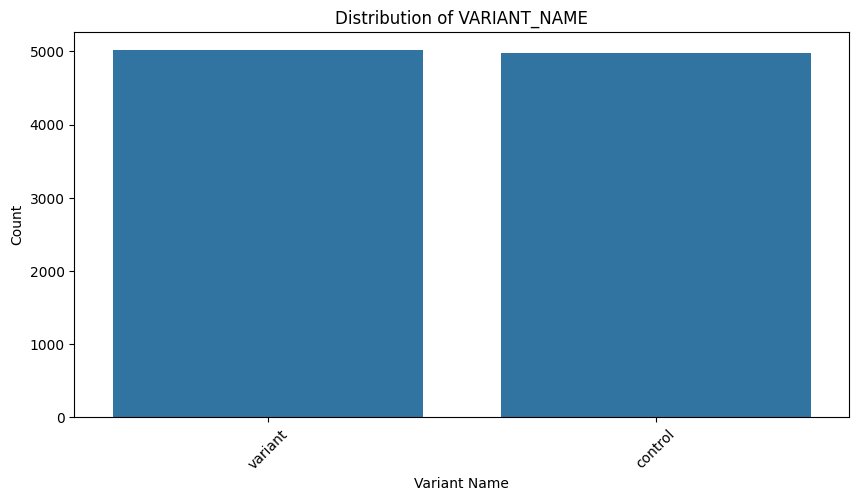

In [9]:
print(df['VARIANT_NAME'].value_counts())
print(df['USER_ID'].nunique())
#TODO : Plotting the Distribution of the VARIANT_NAME column
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='VARIANT_NAME')
plt.title('Distribution of VARIANT_NAME')
plt.xlabel('Variant Name')
plt.ylabel('Count')
plt.xticks(rotation=45)     
plt.show()

# Average Revenue by VARIANT_NAME

In [12]:
#TODO
# Group the data by 'VARIANT_NAME' and calculate the average revenue
average_revenue = df.groupby('VARIANT_NAME')['REVENUE'].mean()

# Display the result
print(average_revenue)

VARIANT_NAME
control    0.129013
variant    0.070070
Name: REVENUE, dtype: float64


What if H0: M1 = M2 ?
What about H1: M1 1= M2 ?

H0: M1 = M2
Null Hypothesis (H0): The mean revenue of the two groups (control and variant) is the same.
This assumes that any difference in the average revenue between the two groups is due to random chance and not because of a real effect.
H1: M1 ≠ M2
Alternative Hypothesis (H1): The mean revenue of the two groups is not the same.
This assumes that there is a significant difference in the average revenue between the two groups, meaning the variant might have a real effect (positive or negative) compared to the control.


In [13]:
from scipy.stats import ttest_ind

# Separate the revenue data for control and variant groups
control_revenue = df[df['VARIANT_NAME'] == 'control']['REVENUE']
variant_revenue = df[df['VARIANT_NAME'] == 'variant']['REVENUE']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(control_revenue, variant_revenue)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference between the two groups.")

T-statistic: 1.2711634519010084
P-value: 0.20370007853373562
Fail to reject the null hypothesis (H0). There is no significant difference between the two groups.


# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [11]:
print(df.columns)

Index(['USER_ID', 'VARIANT_NAME', 'REVENUE'], dtype='object')


In [14]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?
from scipy.stats import shapiro

# Separate the revenue data for control and variant groups
control_revenue = df[df['VARIANT_NAME'] == 'control']['REVENUE']
variant_revenue = df[df['VARIANT_NAME'] == 'variant']['REVENUE']

# Perform the Shapiro-Wilk test for normality
control_stat, control_p = shapiro(control_revenue)
variant_stat, variant_p = shapiro(variant_revenue)

# Display the results
print("Control Group:")
print(f"Shapiro-Wilk Test Statistic: {control_stat}, P-value: {control_p}")

print("\nVariant Group:")
print(f"Shapiro-Wilk Test Statistic: {variant_stat}, P-value: {variant_p}")

# Interpret the results
alpha = 0.05  # Significance level
if control_p < alpha:
    print("\nControl group: The data does not follow a normal distribution (reject H0).")
else:
    print("\nControl group: The data follows a normal distribution (fail to reject H0).")

if variant_p < alpha:
    print("Variant group: The data does not follow a normal distribution (reject H0).")
else:
    print("Variant group: The data follows a normal distribution (fail to reject H0).")

Control Group:
Shapiro-Wilk Test Statistic: 0.01833147442513461, P-value: 2.4983285100057203e-95

Variant Group:
Shapiro-Wilk Test Statistic: 0.027033073451830147, P-value: 2.7310104028899288e-95

Control group: The data does not follow a normal distribution (reject H0).
Variant group: The data does not follow a normal distribution (reject H0).


/Users/margotiamanova/Desktop/DI-Bootcamp/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


P-value significantly lower than 0.05 for both groups, so both groups do not follow a normal distribution in terms of income.

In [16]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?
from scipy.stats import levene
#  Levene Test
stat, p_value = levene(variant_revenue, control_revenue)

print(f"Levene's Test: Statistic={stat}, p-value={p_value}")

Levene's Test: Statistic=1.6158565214488871, p-value=0.20370007853398742


Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This indicates that the variances between the two groups (variant and control) are homogeneous, meaning they are not significantly different.



# Non-Parametric Test (mannwhitneyu Test)

In [17]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(control_revenue, variant_revenue)

# Display the results
print(f"Mann-Whitney U Test Statistic: {u_stat}, P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant difference in revenue between the control and variant groups.")
else:
    print("There is no significant difference in revenue between the control and variant groups.")

Mann-Whitney U Test Statistic: 12521564.0, P-value: 0.47825247965294926
There is no significant difference in revenue between the control and variant groups.


/var/folders/hz/4wr_d_nj47d_tw5jgy2y69lc0000gn/T/ipykernel_14032/41289453.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_revenue, x='VARIANT_NAME', y='REVENUE', palette='coolwarm')


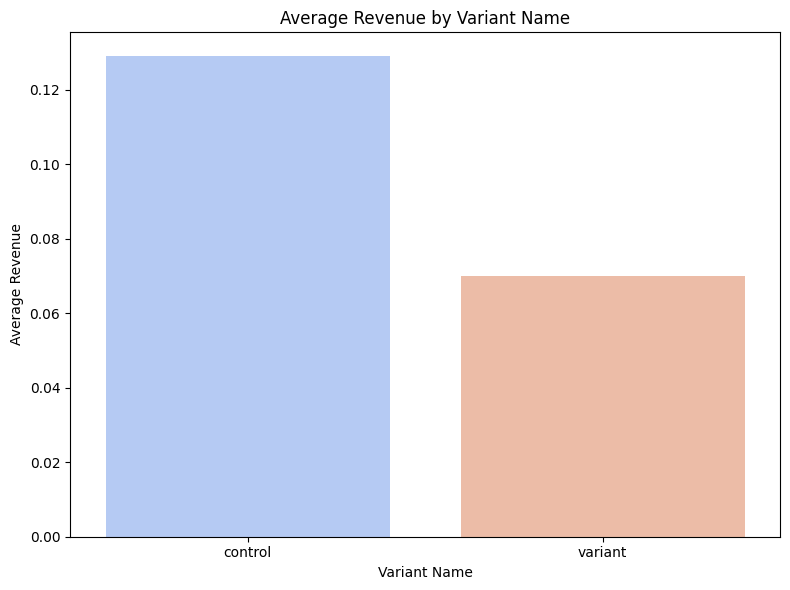

In [18]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average revenue by variant name
average_revenue = df.groupby('VARIANT_NAME')['REVENUE'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=average_revenue, x='VARIANT_NAME', y='REVENUE', palette='coolwarm')

# Add titles and labels
plt.title('Average Revenue by Variant Name')
plt.xlabel('Variant Name')
plt.ylabel('Average Revenue')

# Display the plot
plt.tight_layout()
plt.show()